In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [35]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [37]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5110, dtype: bool

In [38]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [39]:
data.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [40]:
data.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [41]:
data.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

Чтобы заменить тип работы на бинарные значения, проверим зависимость работы и риска инсульта.

<AxesSubplot:xlabel='work_type', ylabel='stroke'>

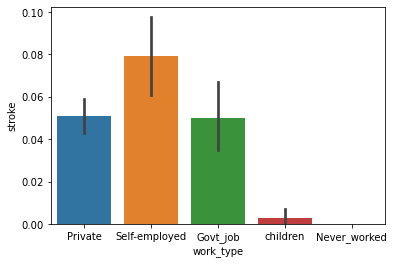

In [42]:
sns.barplot(x=data['work_type'], y=data['stroke'])

In [43]:
urban = data.loc[(data['Residence_type'] == 'Urban') & (data['stroke'] == 1)].groupby('work_type').agg({'stroke': 'count'})
rural = data.loc[(data['Residence_type'] == 'Rural') & (data['stroke'] == 1)].groupby('work_type').agg({'stroke': 'count'})
print('Urban:',urban,'\n\n', 'Rural:', rural)

Urban:                stroke
work_type            
Govt_job           19
Private            81
Self-employed      34
children            1 

 Rural:                stroke
work_type            
Govt_job           14
Private            68
Self-employed      31
children            1


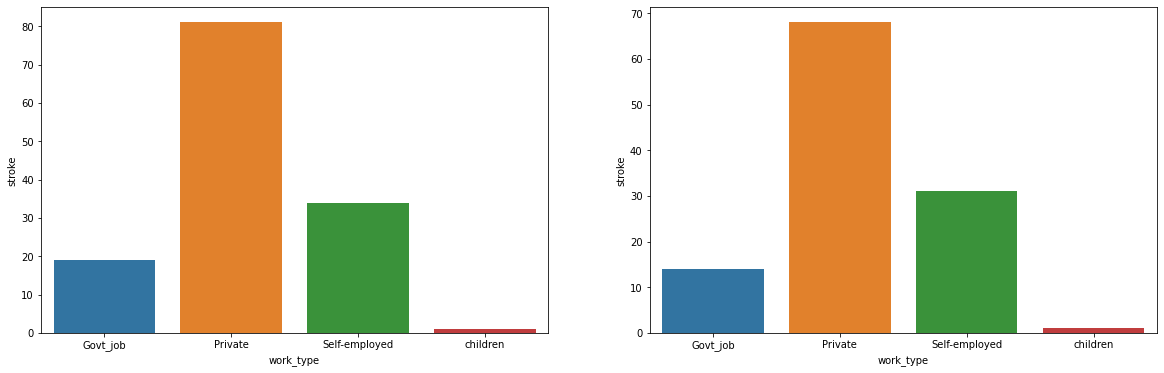

In [44]:
column, axis = plt.subplots(1,2,figsize=(20, 6))
sns.barplot(x=urban.index, y=urban.stroke, ax=axis[0])
sns.barplot(x=rural.index, y=rural.stroke, ax=axis[1])
plt.show()

<AxesSubplot:xlabel='heart_disease', ylabel='stroke'>

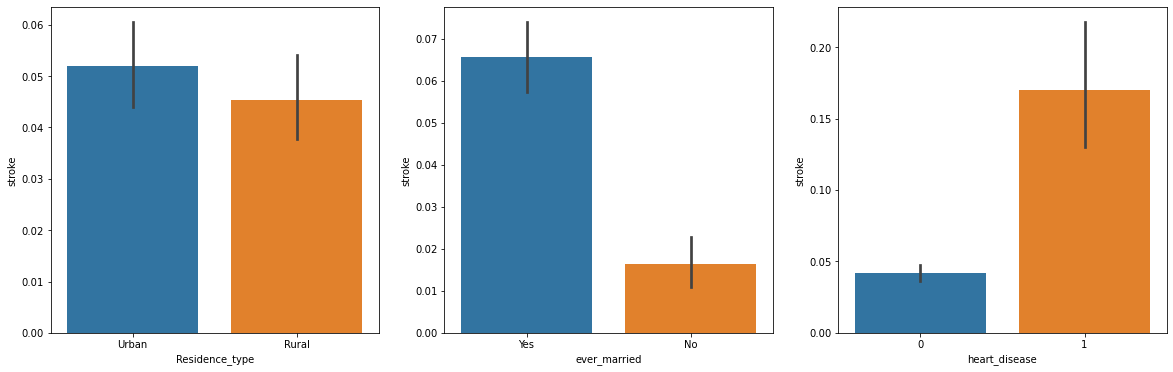

In [45]:
column, axis = plt.subplots(1,3,figsize=(20, 6))
sns.barplot(x='Residence_type', y='stroke', data=data, ax=axis[0])
sns.barplot(x='ever_married', y='stroke', data=data, ax=axis[1])
sns.barplot(x='heart_disease', y='stroke', data=data, ax=axis[2])

<AxesSubplot:xlabel='gender', ylabel='stroke'>

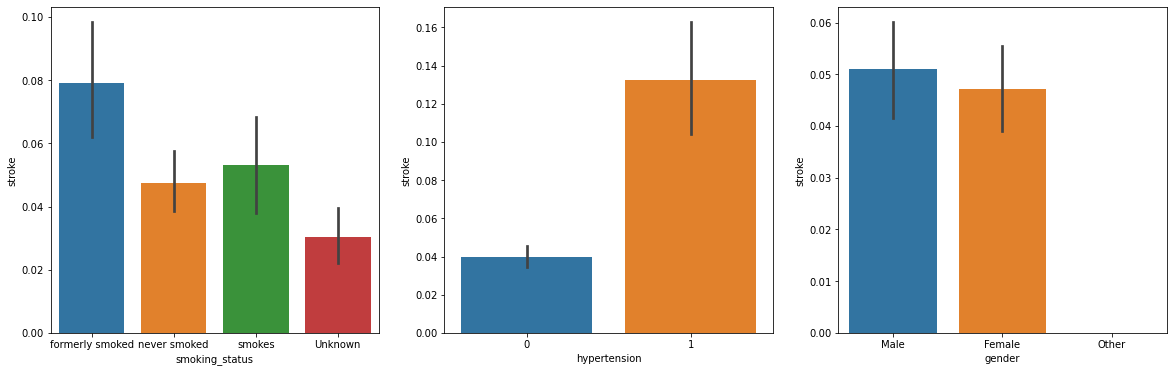

In [46]:
column, axis = plt.subplots(1,3,figsize=(20, 6))
sns.barplot(x='smoking_status', y='stroke', data=data, ax=axis[0])
sns.barplot(x='hypertension', y='stroke', data=data, ax=axis[1])
sns.barplot(x='gender', y='stroke', data=data, ax=axis[2])

In [47]:
data.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


In [48]:
ord_enc = OrdinalEncoder()
data['smoking'] = ord_enc.fit_transform(data[["smoking_status"]])
data['Residence'] = ord_enc.fit_transform(data[["Residence_type"]])
data['work'] = ord_enc.fit_transform(data[["work_type"]])
data['gender_type'] = ord_enc.fit_transform(data[['gender']])
data.drop(columns=['smoking_status', 'Residence_type', 'work_type', 'gender'], axis=1, inplace=True)
data['ever_married'] = data['ever_married'].replace({'Yes': 1, 'No': 0})
data.bmi = data.bmi.fillna(round(data.bmi.mean(), 2))

In [49]:
data.head(10)

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,smoking,Residence,work,gender_type
0,9046,67.0,0,1,1,228.69,36.60,1,1.0,1.0,2.0,1.0
1,51676,61.0,0,0,1,202.21,28.89,1,2.0,0.0,3.0,0.0
2,31112,80.0,0,1,1,105.92,32.50,1,2.0,0.0,2.0,1.0
3,60182,49.0,0,0,1,171.23,34.40,1,3.0,1.0,2.0,0.0
4,1665,79.0,1,0,1,174.12,24.00,1,2.0,0.0,3.0,0.0
5,56669,81.0,0,0,1,186.21,29.00,1,1.0,1.0,2.0,1.0
6,53882,74.0,1,1,1,70.09,27.40,1,2.0,0.0,2.0,1.0
7,10434,69.0,0,0,0,94.39,22.80,1,2.0,1.0,2.0,0.0
8,27419,59.0,0,0,1,76.15,28.89,1,0.0,0.0,2.0,0.0
9,60491,78.0,0,0,1,58.57,24.20,1,0.0,1.0,2.0,0.0


<AxesSubplot:>

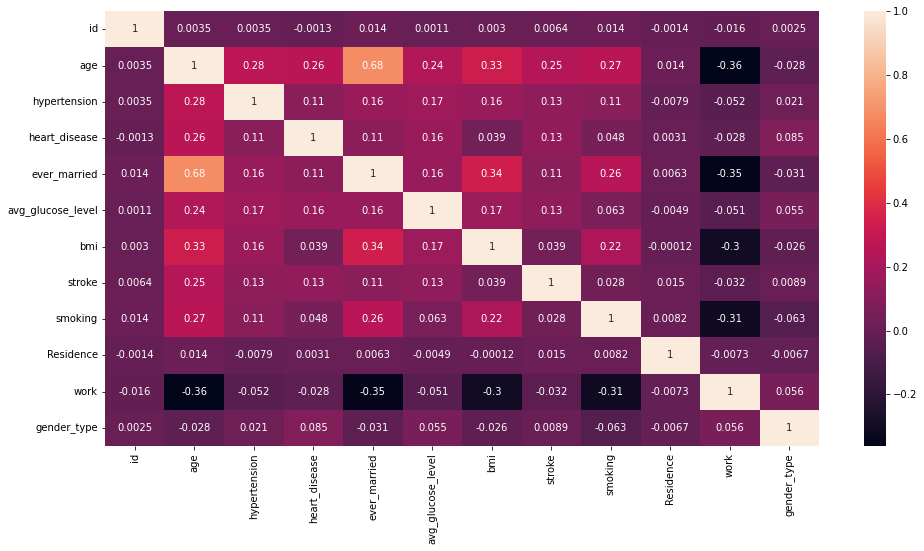

In [50]:
plt.figure(figsize=(16, 8))
sns.heatmap(data.corr(), annot=True)

In [51]:
y = data.stroke
X = data.drop('stroke',axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [61]:
scaler = StandardScaler()
St_train = scaler.fit_transform(X_train)
St_test = scaler.fit_transform(X_test)

In [62]:
model = RandomForestClassifier()
model.fit(St_train, y_train)
preds = model.predict(St_test)

In [63]:
acc = accuracy_score(y_test, preds, normalize=True)
acc

0.9507042253521126

In [64]:
sc = MinMaxScaler()
X_testm = sc.fit_transform(X_test)
X_trainm = sc.fit_transform(X_train)

model.fit(X_trainm, y_train)
pred = model.predict(X_testm)
acc = accuracy_score(y_test, pred, normalize=True)
acc

0.9491392801251957